In [109]:
import pandas as pd
import numpy as np

In [110]:
idx = index=pd.date_range(start='1.1.2024 10:00', end='1.1.2024 14:00', freq='1min')
n=len(idx)
df = pd.DataFrame( index=idx, data={'a': np.sin(np.linspace(0, 4*np.pi,n)) + (np.random.rand(n)-0.5)*0.2, 'b': np.cos(np.linspace(0, 4*np.pi,n)) + (np.random.rand(n)-0.5)*0.2})

In [111]:
df

,a,b
2024-01-01 10:00:00,0.074288,1.059968
2024-01-01 10:01:00,0.034257,1.005281
2024-01-01 10:02:00,0.060062,1.078510
2024-01-01 10:03:00,0.236470,1.010666
2024-01-01 10:04:00,0.139979,1.054811
...,...,...
2024-01-01 13:56:00,-0.222075,0.921937
2024-01-01 13:57:00,-0.077416,1.041787
2024-01-01 13:58:00,-0.186501,1.012022
2024-01-01 13:59:00,-0.105012,1.049113


<Axes: >

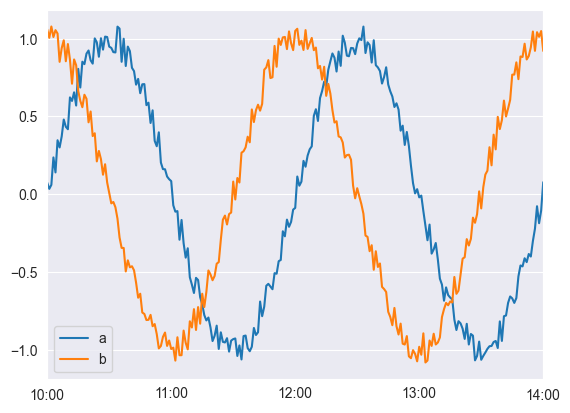

In [112]:
df.plot()

### Pearson Korrelation

Der **Pearson-Korrelationskoeffizient (r)** misst die Stärke und Richtung der linearen Beziehung zwischen zwei Variablen. 

- **Range**: -1 to 1
  - `r = 1`: Perfekte positive lineare Korrelation.
  - `r = -1`: Perfekte negative lineare Korrelation.
  - `r = 0`: Keine lineare Korrelation.

Formel:
$
r = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2} \cdot \sum{(y_i - \bar{y})^2}}}
$

- $x_i, y_i$ Datenpunkte
- $\bar{x}, \bar{y}$ sind die Mittelwerte von $x$ und $y$.

**Anwendung**: Bewertung des linearen Zusammenhangs zwischen zwei kontinuierlichen Variablen z.B. Zeitreihen

In [113]:
df.corr()

,a,b
a,1.000000,0.003971
b,0.003971,1.000000


In [114]:
df['b_shift'] = df.b.shift(periods=2, freq='1min')

In [115]:
df

,a,b,b_shift
2024-01-01 10:00:00,0.074288,1.059968,NaN
2024-01-01 10:01:00,0.034257,1.005281,NaN
2024-01-01 10:02:00,0.060062,1.078510,1.059968
2024-01-01 10:03:00,0.236470,1.010666,1.005281
2024-01-01 10:04:00,0.139979,1.054811,1.078510
...,...,...,...
2024-01-01 13:56:00,-0.222075,0.921937,0.944407
2024-01-01 13:57:00,-0.077416,1.041787,1.046067
2024-01-01 13:58:00,-0.186501,1.012022,0.921937
2024-01-01 13:59:00,-0.105012,1.049113,1.041787


In [116]:
df.corr()

,a,b,b_shift
a,1.000000,0.003971,0.107524
b,0.003971,1.000000,0.988093
b_shift,0.107524,0.988093,1.000000


<Axes: >

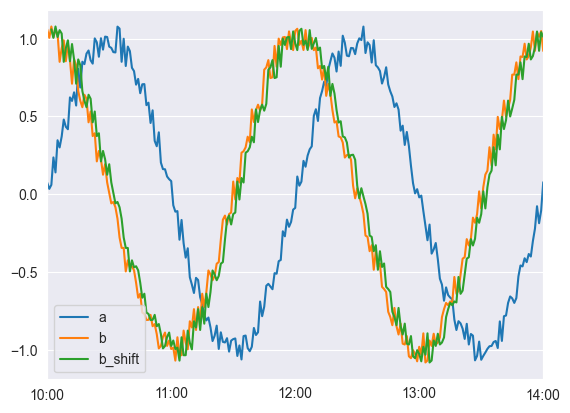

In [117]:
df.plot()

In [118]:
df[['b_10', 'b_20', 'b_30', 'b_40', 'b_50', 'b_60']] = df.b.shift(periods=[10,20,30,40,50,60], freq='1min') 

<Axes: >

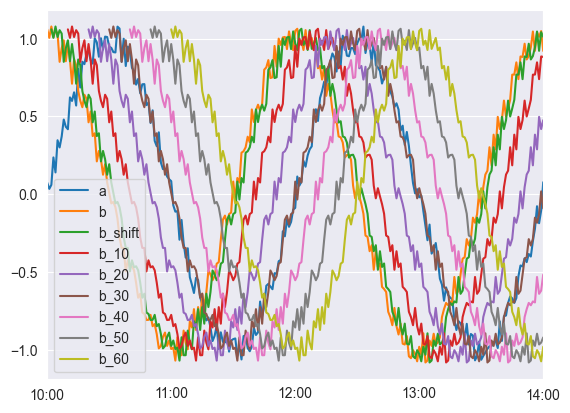

In [120]:
df.plot()

In [ ]:
df.corr()